In [1]:
import numpy as np
from numpy import ndarray as arr
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
# pd_data: list[pd.DataFrame] = [pd.read_csv(f) for f in Path("stocks").glob("**/*")]
pd_data: pd.DataFrame = pd.read_csv("stocks/tsla.csv")

In [3]:
data: arr = np.array(pd_data)

del pd_data

print(data)

[['2010-06-28' 17.0 17.0 ... 17.0 0 0]
 ['2010-06-29' 19.0 25.0 ... 23.89 18783276 0]
 ['2010-06-30' 25.79 30.42 ... 23.83 17194394 0]
 ...
 ['2017-11-08' 305.5 306.89 ... 304.31 4725510 0]
 ['2017-11-09' 302.5 304.46 ... 302.99 5440335 0]
 ['2017-11-10' 302.5 308.36 ... 302.99 4621912 0]]


In [4]:
np.random.shuffle(data)

data[:, 0] = data[:, 0].astype(np.datetime64).astype(np.int64)
data[:, 0] -= np.min(data[:, 0])

# plt.plot(data[:, 0], data[:, 4])

data_test = data[:300]
x_test = data_test[:, [0]].astype(np.int64)
y_test = data_test[:, [4]].astype(np.float64)

data_train = data[300:]
x_train = data_train[:, [0]].astype(np.int64)
y_train = data_train[:, [4]].astype(np.float64)

del data, data_test, data_train

print(x_test.dtype, x_train.dtype, y_test.dtype, y_train.dtype)

int64 int64 float64 float64


In [7]:
def init_parms() -> list[tuple[arr]]:
    w1: arr = 0.01 * (np.random.rand(1, 5) - 0.5)
    b1: arr = 0.01 * (np.random.rand(1, 5) - 0.5)

    w2: arr = 0.01 * (np.random.rand(5, 100) - 0.5)
    b2: arr = 0.01 * (np.random.rand(1, 100) - 0.5)

    w3: arr = 0.01 * (np.random.rand(100, 1) - 0.5)
    b3: arr = 0.01 * (np.random.rand(1, 1) - 0.5)

    return [(w1, b1), (w2, b2), (w3, b3)]


def activationFunction(x: arr, alpha: float = 0.01) -> arr:
    return np.where(x > 0, x, alpha * x)


def activationFunctionDeriv(x: arr, alpha: float = 0.01) -> arr:
    return np.where(x > 0, 1, alpha)


def forward_prop(nn: list[tuple[arr]], x: arr) -> list[tuple[arr]]:
    outputs: list[tuple[arr]] = []

    for i, (w, b) in enumerate(nn):
        inp: arr = outputs[-1][1] if outputs else x


        z: arr = inp @ w + b

        a: arr = activationFunction(z) if i != len(nn) - 1 else z

        outputs.append((z, a))

    return outputs


def back_prop(nn: list[tuple[arr]], outputs: list[arr], x: arr, y: arr) -> list[tuple[arr]]:
    gradient: list[tuple[arr]] = []
    z_deltas: list[arr] = []

    for i in range(len(nn) - 1, -1, -1):
        z, a = outputs[i]

        if z_deltas:
            dz = z_deltas[-1].dot(nn[i + 1][0].T) * activationFunctionDeriv(z)
        else:
            dz = a - y
        
        z_deltas.append(dz)
        
        if i > 0:
            dw = 1 / y.size * dz.T.dot(outputs[i - 1][0])
        else:
            dw = 1 / y.size * dz.T.dot(x)

        db = 1 / y.size * np.sum(dz)

        gradient.append((dw, db))

    return gradient[::-1]

def update_params(nn: list[tuple[arr]], gradient: list[tuple[arr]], learning_rate: float = 0.00001):
    for i, (dw, db) in enumerate(gradient): 
        nn[i] =  (nn[i][0] - learning_rate * dw.T, nn[i][1] - learning_rate * db.T)

def get_error(out: arr, y: arr) -> float:
    return np.mean(np.square(out - y))


def gradient_descend(nn: list[tuple[arr]], x: arr, y: arr, iterations: int = 1000) -> None:
    for i in range(iterations):
        out = forward_prop(nn, x)
        gradient = back_prop(nn, out, x, y)
        # print(y_train[:2], thing[-1][1][:2], '\n')
        update_params(nn, gradient)

        if i % 100 == 0:
            print(f"Iteration {i}: {get_error(out[-1][1], y_train)}")


nn = init_parms()

gradient_descend(nn, x_train, y_train, 100_000)

    

Iteration 0: 33774.61469584851
Iteration 100: 33729.70818894421
Iteration 200: 33684.76229536625
Iteration 300: 33638.5657996193
Iteration 400: 33388.75924333322
Iteration 500: 1918.2554339539447
Iteration 600: 1915.5344476963296
Iteration 700: 1912.9162504797002
Iteration 800: 1910.393364220856
Iteration 900: 1907.9466277077292
Iteration 1000: 1905.545458465857
Iteration 1100: 1903.1823399976734
Iteration 1200: 1900.8470965835788
Iteration 1300: 1898.5288992283665
Iteration 1400: 1896.2180076962193
Iteration 1500: 1893.9050105789609
Iteration 1600: 1891.5819941623286
Iteration 1700: 1889.2423860754266
Iteration 1800: 1886.8824960582522
Iteration 1900: 1884.496573183043
Iteration 2000: 1882.0819314395421
Iteration 2100: 1879.6338975131343
Iteration 2200: 1877.150498739032
Iteration 2300: 1874.6285340123486
Iteration 2400: 1872.0698429734025
Iteration 2500: 1869.4705628246627
Iteration 2600: 1866.8326015436546
Iteration 2700: 1864.1565056474735
Iteration 2800: 1861.4432970209264
Iterati

[[   2]
 [   8]
 [   9]
 [  10]
 [  23]
 [  49]
 [  57]
 [  63]
 [  72]
 [  78]
 [  79]
 [  80]
 [ 116]
 [ 119]
 [ 123]
 [ 136]
 [ 168]
 [ 171]
 [ 182]
 [ 186]
 [ 205]
 [ 206]
 [ 225]
 [ 241]
 [ 253]
 [ 269]
 [ 270]
 [ 275]
 [ 284]
 [ 295]
 [ 302]
 [ 317]
 [ 325]
 [ 339]
 [ 379]
 [ 381]
 [ 382]
 [ 410]
 [ 415]
 [ 422]
 [ 423]
 [ 429]
 [ 437]
 [ 441]
 [ 443]
 [ 445]
 [ 451]
 [ 458]
 [ 459]
 [ 462]
 [ 464]
 [ 466]
 [ 476]
 [ 486]
 [ 487]
 [ 490]
 [ 532]
 [ 539]
 [ 542]
 [ 543]
 [ 549]
 [ 554]
 [ 592]
 [ 605]
 [ 609]
 [ 616]
 [ 624]
 [ 626]
 [ 633]
 [ 653]
 [ 681]
 [ 689]
 [ 722]
 [ 735]
 [ 743]
 [ 745]
 [ 767]
 [ 770]
 [ 795]
 [ 806]
 [ 813]
 [ 830]
 [ 834]
 [ 870]
 [ 876]
 [ 890]
 [ 891]
 [ 900]
 [ 914]
 [ 921]
 [ 924]
 [ 941]
 [ 947]
 [ 969]
 [ 977]
 [ 997]
 [ 998]
 [1001]
 [1015]
 [1019]
 [1023]
 [1026]
 [1032]
 [1037]
 [1039]
 [1057]
 [1059]
 [1065]
 [1072]
 [1085]
 [1086]
 [1087]
 [1089]
 [1096]
 [1100]
 [1101]
 [1127]
 [1131]
 [1137]
 [1138]
 [1143]
 [1150]
 [1156]
 [1166]
 [1173]


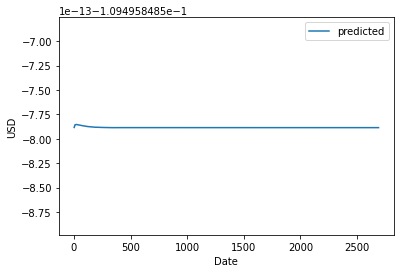

In [ ]:
nn = 10 * init_parms()

_x_test = np.sort(x_test, axis=0)


out = forward_prop(nn, _x_test)[-1][1]

# print(out)

i = np.argsort(x_test, axis=0).reshape((300, ))


#plt.plot(_x_test, y_test[i], label="actual")
plt.plot(_x_test, out, label="predicted")


plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()
